<a href="https://colab.research.google.com/github/Albatross3/OpensourceSoftware/blob/master/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mnist
Mnist는 70000개의 데이터 샘플이며 딕셔너리 형태로 저장되어있다

딕셔너링 중에서 'data'와 'target' key 에 해당하는 데이터를 각각 X,y 로저장해준다. (y는 string으로 저장되어 있으므로 정수 형태로 바꾸어준다)

Mnist 데이터는 이미 training set와 test set이 나누어져 있고 training set가 shuffling 되어있기 때문에 그대로 사용해도 좋다.



In [7]:
from sklearn.datasets import fetch_openml
mnist=fetch_openml('mnist_784',version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [8]:
X,y=mnist['data'],mnist['target']
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


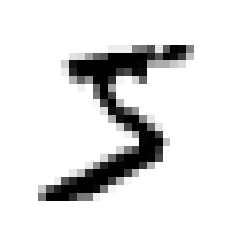

In [9]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit=X[0]
some_digit_score=some_digit.reshape(28,28)

plt.imshow(some_digit_score, cmap="binary")
plt.axis("off")
plt.show()

In [10]:
import numpy as np
y[0]
y=y.astype(np.uint8)
y

array([5, 0, 4, ..., 4, 5, 6], dtype=uint8)

In [11]:
X_train, X_test , y_train , y_test =X[:60000], X[60000:] ,y[:60000],y[60000:]

# Training a Binary Classifier


*   5와 5가 아닌 것으로 구분하는 classifier를 학습시킨다
*   target label의 조정과 classifier는 SGD classifier로 한다




In [12]:
#target label 조정
y_train_5=(y_train==5)
y_test_5=(y_test==5)


In [13]:
from sklearn.linear_model import SGDClassifier

sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [14]:
sgd_clf.predict([some_digit])

array([ True])

# Performance Measures
학습한 Classifier가 제대로 예측하는지 평가하는 평가 기준을 마련해야 한다.



## Measuring Accuracy Using Cross-validation


1.   K-fold cross-validation(cv=3)
  * 3개의 그룹에 대해서 각각 모델을 만들고 예측을 한 뒤 accuracy에 대해 평가한다
  * 각 그룹에 대한 결과 [0.95035, 0.96035, 0.9604 ]


2.   Dumb Classifier that just classifies every single image in the "not-5" calss
  * 오직 10%만이 5에 해당하는 이미지이므로 90%정도는 맞추게 된다
  * 각 그롭에 대한 결과 [0.91125, 0.90855, 0.90915]

### 결론: Accuracy만으로 모델을 평가하기에 부족하다 (특히, target label의 개수가 편향된 경우)


In [15]:
#cross_val_score() -> returning evaluation scores

from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_train_5, cv=3 , scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [ ]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
  def fit(self,X,y=None):
    return self
  def predict(self,X):
    return np.zeros((len(X),1),dtype=bool)

In [ ]:
never_5_clf=Never5Classifier()
cross_val_score(never_5_clf,X_train,y_train_5, cv=3 ,scoring='accuracy')

array([0.91125, 0.90855, 0.90915])

## Confusion Matrix



---

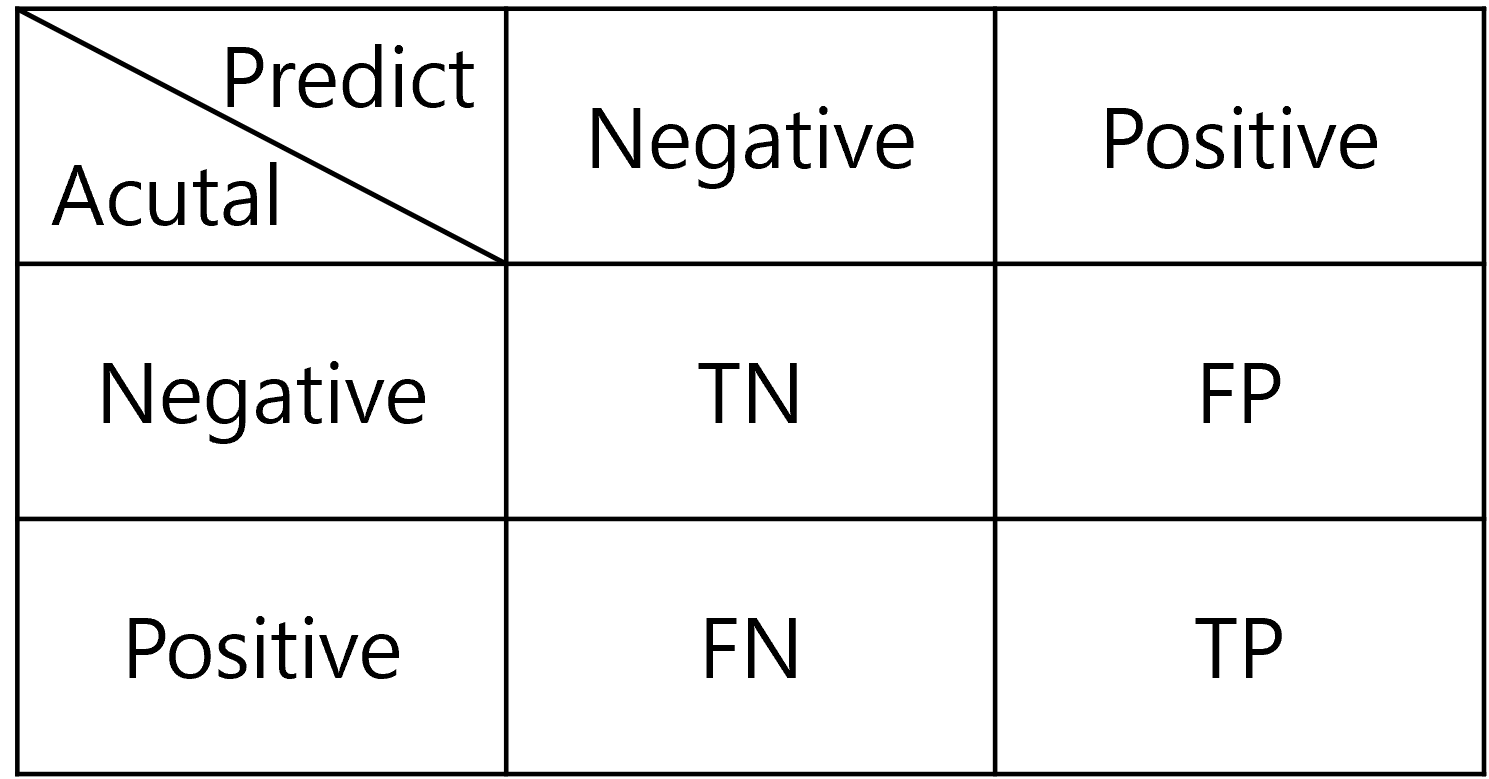


---



Accuracy의 대안으로 쓰이는 평가 지표들

*   Precision
*   Recall
*   f1



In [16]:
#cross_val_predict() -> retruns the predictons made on each test folds.

from sklearn.model_selection import cross_val_predict

y_train_pred=cross_val_predict(sgd_clf,X_train,y_train_5, cv=3)

In [17]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5,y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

## Precision and Recall

Precision=TP/(TP+FP)

Recall=TP/(FN+TP)

F1= 2 × Precision × Recall/(Precision+Recall)

In [ ]:
from sklearn.metrics import precision_score, recall_score
print(precision_score(y_train_5,y_train_pred))
print(recall_score(y_train_5,y_train_pred))

0.8370879772350012
0.6511713705958311


In [ ]:
from sklearn.metrics import f1_score
f1_score(y_train_5,y_train_pred)

0.7325171197343846

## Precision/Recall Trade-off
각 instance마다 *decision function*에 의해 score 값이 결정되고 이를 threshold 값과 비교해서 클래스를 할당한다

ex)score> threshold -> 1 , score <threshold -> 0

위와 같은 방식에서 threshold가 작은 값인가 큰 값인가에 따라서 Precision과 Recall 값의 Trade-off가 존재한다.

In [ ]:
#decision_function() -> returns a score for each instance
y_scores=sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [ ]:
threshold=0
y_some_digit_pred=(y_scores>threshold)
y_some_digit_pred

array([ True])

In [ ]:
threshold=8000
y_some_digit_pred=y_some_digit_pred=(y_scores>threshold)
y_some_digit_pred

array([False])

In [ ]:
y_scores=cross_val_predict(sgd_clf,X_train,y_train_5, cv=3, method='decision_function' )

In [ ]:
#compute precision and recall for all possible thresholds

from sklearn.metrics import precision_recall_curve
precisions,recalls, thresholds= precision_recall_curve(y_train_5 , y_scores)

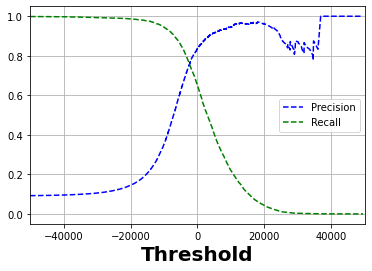

In [ ]:
def plot_precision_recall_vs_threshold(precisions,recalls,thresholds):
  plt.plot(thresholds,precisions[:-1],'b--',label="Precision")
  plt.plot(thresholds,recalls[:-1],'g--',label="Recall")
  plt.xlim([-50000,50000])
  plt.xlabel("Threshold",fontdict={'weight':'bold','size':20})
  plt.legend()
  plt.grid()

plot_precision_recall_vs_threshold(precisions,recalls,thresholds)
plt.show()

In [ ]:
threshold_90_precision= thresholds[np.argmax(precisions>=0.90)]

y_train_pred_90 = (y_scores >= threshold_90_precision)
print(precision_score(y_train_5, y_train_pred_90))
print(recall_score(y_train_5,y_train_pred_90))

0.9000345901072293
0.4799852425751706


## ROC Curve
positive class가 rare 한 경우 -> PR curve 사용 (MNIST의 경우)

그렇지 않은 경우 -> ROC curve 사용


*   common tool used with binary classifier
*   ROC curve plots the true positive ratio(Recall) against false positive rate(FPR)
*   TPR/FPR = TPR/(1-TNR) = recall/(1-specificity)



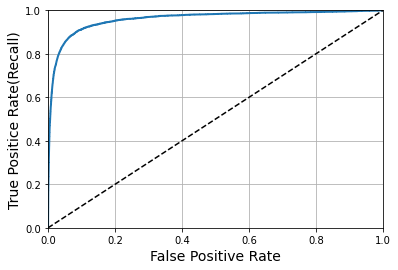

In [ ]:
from sklearn.metrics import roc_curve
fpr ,tpr, thresholds = roc_curve(y_train_5, y_scores)

def plot_roc_curve(fpr,tpr,label=None):
  plt.plot(fpr,tpr,linewidth=2, label=label)
  plt.plot([0,1],[0,1],'k--')

  plt.xlabel('False Positive Rate', fontsize=14)
  plt.ylabel('True Positice Rate(Recall)' , fontsize=14)
  plt.axis([0,1,0,1])
  plt.grid()

plot_roc_curve(fpr,tpr)
plt.show()

In [ ]:
#area under the curve(AUC)

from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

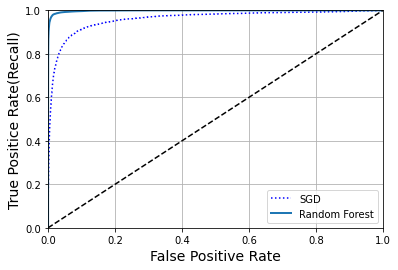

In [ ]:
## RandomForestClassifier 와 SGD Classifier의 비교 <ROC curve와 AUC를 통해> 

from sklearn.ensemble import RandomForestClassifier

forest_clf=RandomForestClassifier(random_state=42)
y_probas_forest=cross_val_predict(forest_clf,X_train, y_train_5 , cv=3, method='predict_proba')

y_scores_forest=y_probas_forest[:,1]
fpr_forest, tpr_forest, thresholds_forest= roc_curve(y_train_5, y_scores_forest)

plt.plot(fpr,tpr,'b:',label="SGD")
plot_roc_curve(fpr_forest,tpr_forest,"Random Forest")
plt.legend(loc="lower right")
plt.show()

In [ ]:
roc_auc_score(y_train_5,y_scores_forest)

# Multiclass Classification

binary classifier를 여러번 이용해서 multicalss classifiction을 한다. 

Multiple class 바로 가능한 알고리즘 -> SGD Classifier, Random Forest Classifier, naive Bayes Classifiers...

binary class만 가능한 경우-> Logistic Regression, Support Vector Machine... 

전략은 크게 2가지

1.   *one-versus-the-rest* (OvR) strategy
2.   *one-versus-one* (OvO) strategy



In [ ]:
# 실행시 9분정도 걸림
from sklearn.svm import SVC
svm_clf=SVC()
svm_clf.fit(X_train, y_train)
svm_clf.predict([some_digit])

array([5], dtype=uint8)

In [ ]:
some_digit_scores=svm_clf.decision_function([some_digit])
some_digit_scores

array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [ ]:
np.argmax(some_digit_scores)

5

In [ ]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
svm_clf.classes_[5]

5

In [ ]:
# Support Vector Machine classifier에서 OvR 전략을 이욯해 학습
## train data만 60000개이므로 1000개로 줄여서 학습

from sklearn.multiclass import OneVsRestClassifier
ovr_clf=OneVsRestClassifier(SVC())
ovr_clf.fit(X_train[:1000],y_train[:1000])
ovr_clf.predict([some_digit])

array([5], dtype=uint8)

In [ ]:
len(ovr_clf.estimators_)

10

In [ ]:
## SGD clasifier는 곧바로 intance를 multiple classes로 분류가능

sgd_clf.fit(X_train,y_train)
sgd_clf.predict([some_digit])

array([3], dtype=uint8)

In [ ]:
sgd_clf.decision_function([some_digit])

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [ ]:
#시간이 오래 걸림 -> 대략 84%
cross_val_score(sgd_clf,X_train,y_train, cv=3, scoring="accuracy")

In [ ]:
#scaling을 통해서 accuracy 값을 89% 정도로 올림
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

# Error Analysis
analyze the types of errors model makes.


<sgd_clf의 Errors>
1.   다른 class에 비해 많은 instance를 8로 잘못 분류한다. -> 더 많은 8과 비슷한 traing data 모으기 , engineer new features(writing algorithm to count the number of closed loops) , preprocess image
2.   모델이 3과 5를 서로 헷갈려 한다 -> preprocess the images to ensure that they are well centered and not too rotated



In [ ]:
y_train_pred=cross_val_predict(sgd_clf,X_train_scaled, y_train ,cv=3)
conf_mx= confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]])

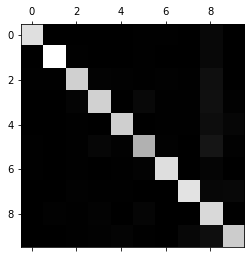

In [ ]:
plt.matshow(conf_mx , cmap= plt.cm.gray)
plt.show()

In [ ]:
# 각 열의 원소들을 각 열의 합으로 나누어주어 가장 예측력이 떨어지는 부분을 관찰한다 

row_sums=conf_mx.sum(axis=1 , keepdims=True)
norm_conf_mx= conf_mx/row_sums

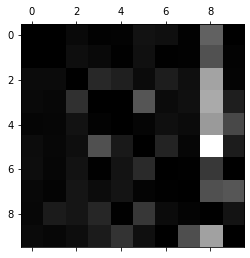

In [ ]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap= plt.cm.gray)
plt.show()

In [14]:
import numpy as np
# plot_digits() 함수
def plot_digits(instances, images_per_row=10, **options): 
    # **options = 가변 키워드 인수(얼마든지 많은 옵션을 포함할 수 있음)
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size, size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row: (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap=mpl.cm.binary, **options)
    plt.axis("off")

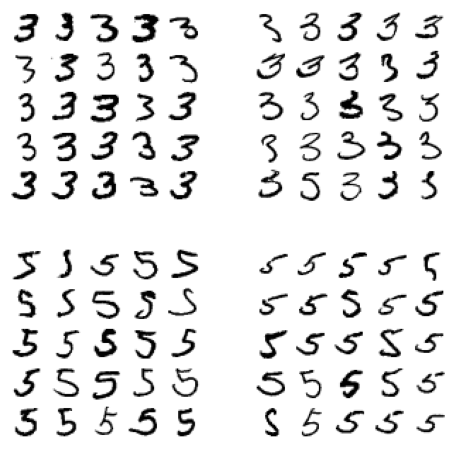

In [ ]:
cl_a,cl_b=3,5
X_aa=X_train[(y_train == cl_a)& (y_train_pred ==cl_a)]
X_ab=X_train[(y_train == cl_a)& (y_train_pred ==cl_b)]
X_ba=X_train[(y_train == cl_b)& (y_train_pred ==cl_a)]
X_bb=X_train[(y_train == cl_b)& (y_train_pred ==cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25],images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25],images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25],images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25],images_per_row=5)
plt.show()

# Multilabel Classification

1개의 instance가 여러 개의 label을 가지게 되는 Classification


In [9]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large= (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel= np.c_[y_train_large,y_train_odd]

knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [10]:
knn_clf.predict([some_digit])


array([[False,  True]])

In [ ]:
#multilabel classification의 f1 score
##대략 0.976
y_train_knn_pred=cross_val_predict(knn_clf, X_train, y_multilabel , cv=3)
f1_score(y_multilabel ,y_train_knn_pred, average="macro")

# Multioutput Classification

예를 들어 노이즈가 있는 이미지를 input으로 깨끗한 digit 이미지를 output으로 만드는 system을 만드려고 한다

이 때, 각 이미지는 28 × 28 = 784개의 pixel(label)로 이루어져 있고 각 label은 다시 0~255까지의 값을 가지게 된다.

In [7]:
noise = np.random.randint(0,100,(len(X_train),784))
X_train_mod=X_train+noise
noise = np.random.randint(0,100,(len(X_test),784))
X_test_mod =X_test+noise
y_train_mod =X_train
y_test_mod=X_test

In [18]:
def plot_digit(data):
  image=data.reshape(28,28)
  plt.imshow(image,cmap=mpl.cm.binary, interpolation='nearest')
  plt.axis('off')

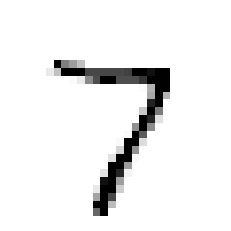

In [19]:
some_index=0
knn_clf.fit(X_train_mod,y_train_mod)
clean_digit=knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)